In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
from pathlib import Path

In [14]:
plotting_folder = 'to_plot'
plotting_folder_path = Path(plotting_folder)
data_files = list(plotting_folder_path.glob('*.csv'))
print(f"plotting files: {data_files}")

plotting files: [WindowsPath('to_plot/BR_21_18.csv'), WindowsPath('to_plot/BR_21_20.csv')]


In [15]:
def plot_training_history(csv_list):
    # Lists to hold per-run metrics
    all_train_loss = []
    all_val_loss = []
    all_train_f1 = []
    all_val_f1 = []
    all_train_acc = []
    all_val_acc = []

    # Read all CSVs and collect metrics
    min_len = None
    for csv_file in csv_list:
        train_loss, val_loss = [], []
        train_f1, val_f1 = [], []
        train_acc, val_acc = [], []
        with open(csv_file, 'r', encoding='utf-8') as f:
            reader = csv.DictReader(f)
            for row in reader:
                train_loss.append(float(row['train_loss']))
                val_loss.append(float(row['val_loss']))
                train_f1.append(float(row['train_f1']))
                val_f1.append(float(row['val_f1']))
                train_acc.append(float(row['train_accuracy']))
                val_acc.append(float(row['val_accuracy']))
        # Track the minimum length
        if min_len is None or len(train_loss) < min_len:
            min_len = len(train_loss)
        all_train_loss.append(train_loss)
        all_val_loss.append(val_loss)
        all_train_f1.append(train_f1)
        all_val_f1.append(val_f1)
        all_train_acc.append(train_acc)
        all_val_acc.append(val_acc)

    # Truncate all lists to the minimum length
    def truncate(lst):
        return [x[:min_len] for x in lst]

    all_train_loss = np.array(truncate(all_train_loss))
    all_val_loss = np.array(truncate(all_val_loss))
    all_train_f1 = np.array(truncate(all_train_f1))
    all_val_f1 = np.array(truncate(all_val_f1))
    all_train_acc = np.array(truncate(all_train_acc))
    all_val_acc = np.array(truncate(all_val_acc))

    epochs = np.arange(1, min_len + 1)

    # Helper to plot mean and std
    def plot_metric(mean_train, std_train, mean_val, std_val, ylabel, title):
        plt.figure(figsize=(8, 5))
        plt.plot(epochs, mean_train, color='blue', label='Training')
        plt.fill_between(epochs, mean_train - std_train, mean_train + std_train, color='blue', alpha=0.2)
        plt.plot(epochs, mean_val, color='orange', label='Validation')
        plt.fill_between(epochs, mean_val - std_val, mean_val + std_val, color='orange', alpha=0.2)
        plt.xlabel('Epoch')
        plt.ylabel(ylabel)
        plt.title(title)
        plt.legend()
        plt.grid(True)
        plt.show()

    # Compute mean and std for each metric
    mean_train_loss = np.mean(all_train_loss, axis=0)
    std_train_loss = np.std(all_train_loss, axis=0)
    mean_val_loss = np.mean(all_val_loss, axis=0)
    std_val_loss = np.std(all_val_loss, axis=0)

    mean_train_f1 = np.mean(all_train_f1, axis=0)
    std_train_f1 = np.std(all_train_f1, axis=0)
    mean_val_f1 = np.mean(all_val_f1, axis=0)
    std_val_f1 = np.std(all_val_f1, axis=0)

    mean_train_acc = np.mean(all_train_acc, axis=0)
    std_train_acc = np.std(all_train_acc, axis=0)
    mean_val_acc = np.mean(all_val_acc, axis=0)
    std_val_acc = np.std(all_val_acc, axis=0)

    # Plot Loss
    plot_metric(mean_train_loss, std_train_loss, mean_val_loss, std_val_loss, 'Loss', 'Mean Training and Validation Loss')

    # Plot F1
    plot_metric(mean_train_f1, std_train_f1, mean_val_f1, std_val_f1, 'F1 Score', 'Mean Training and Validation F1 Score')

    # Plot Accuracy
    plot_metric(mean_train_acc, std_train_acc, mean_val_acc, std_val_acc, 'Accuracy', 'Mean Training and Validation Accuracy')

In [16]:
def plot_training_history_combined(csv_list, fig, axs):
    # Lists to hold per-run metrics
    all_train_loss = []
    all_val_loss = []
    all_train_f1 = []
    all_val_f1 = []
    all_train_acc = []
    all_val_acc = []

    # Read all CSVs and collect metrics
    min_len = None
    for csv_file in csv_list:
        train_loss, val_loss = [], []
        train_f1, val_f1 = [], []
        train_acc, val_acc = [], []
        with open(csv_file, 'r', encoding='utf-8') as f:
            reader = csv.DictReader(f)
            for row in reader:
                train_loss.append(float(row['train_loss']))
                val_loss.append(float(row['val_loss']))
                train_f1.append(float(row['train_f1']))
                val_f1.append(float(row['val_f1']))
                train_acc.append(float(row['train_accuracy']))
                val_acc.append(float(row['val_accuracy']))
        # Track the minimum length
        if min_len is None or len(train_loss) < min_len:
            min_len = len(train_loss)
        all_train_loss.append(train_loss)
        all_val_loss.append(val_loss)
        all_train_f1.append(train_f1)
        all_val_f1.append(val_f1)
        all_train_acc.append(train_acc)
        all_val_acc.append(val_acc)

    # Truncate all lists to the minimum length
    def truncate(lst):
        return [x[:min_len] for x in lst]

    all_train_loss = np.array(truncate(all_train_loss))
    all_val_loss = np.array(truncate(all_val_loss))
    all_train_f1 = np.array(truncate(all_train_f1))
    all_val_f1 = np.array(truncate(all_val_f1))
    all_train_acc = np.array(truncate(all_train_acc))
    all_val_acc = np.array(truncate(all_val_acc))

    epochs = np.arange(1, min_len + 1)

    # Helper to plot mean and std
    def plot_metric(mean_train, std_train, mean_val, std_val, ylabel, title, ax):
        ax.plot(epochs, mean_train, color='blue', label='Training')
        ax.fill_between(epochs, mean_train - std_train, mean_train + std_train, color='blue', alpha=0.2)
        ax.plot(epochs, mean_val, color='orange', label='Validation')
        ax.fill_between(epochs, mean_val - std_val, mean_val + std_val, color='orange', alpha=0.2)
        ax.set_xlabel('Epoch')
        ax.set_ylabel(ylabel)
        ax.set_title(title)
        ax.legend()
        ax.grid(True)

    # Compute mean and std for each metric
    mean_train_loss = np.mean(all_train_loss, axis=0)
    std_train_loss = np.std(all_train_loss, axis=0)
    mean_val_loss = np.mean(all_val_loss, axis=0)
    std_val_loss = np.std(all_val_loss, axis=0)

    mean_train_f1 = np.mean(all_train_f1, axis=0)
    std_train_f1 = np.std(all_train_f1, axis=0)
    mean_val_f1 = np.mean(all_val_f1, axis=0)
    std_val_f1 = np.std(all_val_f1, axis=0)

    mean_train_acc = np.mean(all_train_acc, axis=0)
    std_train_acc = np.std(all_train_acc, axis=0)
    mean_val_acc = np.mean(all_val_acc, axis=0)
    std_val_acc = np.std(all_val_acc, axis=0)

    # Plot Loss
    plot_metric(mean_train_loss, std_train_loss, mean_val_loss, std_val_loss, 'Loss', 'Mean Training and Validation Loss', axs[0])

    # Plot F1
    plot_metric(mean_train_f1, std_train_f1, mean_val_f1, std_val_f1, 'F1 Score', 'Mean Training and Validation F1 Score', axs[1])

    # Plot Accuracy
    plot_metric(mean_train_acc, std_train_acc, mean_val_acc, std_val_acc, 'Accuracy', 'Mean Training and Validation Accuracy', axs[2])

In [17]:
def unite_trainings(csv_lists):
    # take multiple lists of lists of csvs, and for each list calls plot_training_history, and plots all plots together in the same figure
    # for each list of csvs, call plot_training_history
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))
    fig.subplots_adjust(hspace=0.5)
    for csv_list in csv_lists:
        plot_training_history_combined(csv_list, fig, axs)

In [18]:
csv_list = []
for csv_file in data_files:
    if os.path.isfile(csv_file):
        csv_list.append(csv_file)
    else:
        print(f"File {csv_file} does not exist.")
        exit(1)
if len(csv_list) == 0:
    print("No valid CSV files provided.")
    exit(1)

if not all(os.path.isfile(csv_file) for csv_file in csv_list):
    print("One or more CSV files do not exist.")
    exit(1)

#plot_training_history(csv_list)

In [19]:
def plot_multiple_algorithm_histories(list_of_algorithm_csv_lists, algorithm_names):
    """
    Plots the mean training and validation metrics for multiple algorithms 
    on the same set of plots for comparison.

    Args:
        list_of_algorithm_csv_lists (list of lists of str or Path): 
            Each inner list contains paths to CSV files for multiple runs of a single algorithm.
            CSV files must contain columns: 'train_loss', 'val_loss', 'train_f1', 
            'val_f1', 'train_accuracy', 'val_accuracy'.
        algorithm_names (list of str): 
            Names for each algorithm, corresponding to the inner lists. Used for labeling.
    """
    if not list_of_algorithm_csv_lists or not any(list_of_algorithm_csv_lists):
        print("No CSV data provided. Nothing to plot.")
        return
        
    if len(list_of_algorithm_csv_lists) != len(algorithm_names):
        print("Error: The number of algorithm CSV lists must match the number of algorithm names.")
        return

    num_algorithms = len(list_of_algorithm_csv_lists)
    
    # Define a list of distinct colors for different algorithms
    # Using matplotlib's 'tab10' colormap colors
    color_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

    #fig, axs = plt.subplots(3, 1, figsize=(12, 18), sharex=False) # 3 rows for Loss, F1, Accuracy
    fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharex=False) # 1 rows, 2 columns for F1 and Accuracy
    # sharex=False because different algorithms might have different epoch lengths after truncation

    plot_info = [
        #{'title': 'Mean Validation Loss', 'ylabel': 'Loss', 
         #'train_key': 'train_loss', 'val_key': 'val_loss', 'ax_idx': 0},
        {'title': 'Mean Validation F1 Score', 'ylabel': 'F1 Score',
         'train_key': 'train_f1', 'val_key': 'val_f1', 'ax_idx': 0},
        {'title': 'Mean Validation Accuracy', 'ylabel': 'Accuracy',
         'train_key': 'train_accuracy', 'val_key': 'val_accuracy', 'ax_idx': 1}
    ]

    for ax_idx_setup in range(2):
        axs[ax_idx_setup].set_xlabel('Epoch', fontsize=20)
        axs[ax_idx_setup].set_ylabel(plot_info[ax_idx_setup]['ylabel'], fontsize=20)
        axs[ax_idx_setup].set_title(plot_info[ax_idx_setup]['title'], fontsize=20)
        axs[ax_idx_setup].grid(True)

    max_epochs_overall = 0 # To potentially align x-axis limits if desired, though individual epoch lengths are used

    for algo_idx, (algo_csv_list, algo_name) in enumerate(zip(list_of_algorithm_csv_lists, algorithm_names)):
        if not algo_csv_list:
            print(f"Warning: No CSV files provided for algorithm '{algo_name}'. Skipping.")
            continue

        # --- Data aggregation for the current algorithm ---
        algo_metrics_runs = {
            #'train_loss': [], 'val_loss': [],
            'train_f1': [], 'val_f1': [],
            'train_accuracy': [], 'val_accuracy': []
        }
        
        min_len_epochs_algo = float('inf') # Min epochs for this specific algorithm's runs
        valid_runs_for_algo = 0

        for csv_file_path_obj in algo_csv_list:
            csv_file_path = str(csv_file_path_obj) # Ensure it's a string for os.path.isfile
            if not os.path.isfile(csv_file_path):
                print(f"Warning: File {csv_file_path} for algorithm '{algo_name}' does not exist. Skipping this file.")
                continue
            
            current_run_metrics = {key: [] for key in algo_metrics_runs.keys()}
            
            try:
                with open(csv_file_path, 'r', encoding='utf-8') as f:
                    reader = csv.DictReader(f)
                    if not reader.fieldnames: # Check for empty or malformed CSV
                        print(f"Warning: CSV file {csv_file_path} for algorithm '{algo_name}' is empty or has no header. Skipping.")
                        continue
                    
                    # Verify all required keys are in the header
                    required_keys_in_csv = list(algo_metrics_runs.keys())
                    missing_keys = [key for key in required_keys_in_csv if key not in reader.fieldnames]
                    if missing_keys:
                        print(f"Warning: Missing columns {missing_keys} in {csv_file_path} for algorithm '{algo_name}'. Skipping this file.")
                        continue

                    for row_idx, row in enumerate(reader):
                        try:
                            for key in algo_metrics_runs.keys():
                                current_run_metrics[key].append(float(row[key]))
                        except ValueError as e:
                            print(f"ValueError: Could not convert data to float in {csv_file_path} (row {row_idx+2}, key likely '{key}'): {e}. Skipping row.")
                            # If a row has bad data, we might need to truncate all lists for this run to row_idx
                            for k_metric in algo_metrics_runs.keys():
                                current_run_metrics[k_metric] = current_run_metrics[k_metric][:row_idx] # truncate up to bad row
                            break # Stop processing this file's rows
                
                if len(current_run_metrics['val_f1']) > 0: # If data was actually read for this run
                    min_len_epochs_algo = min(min_len_epochs_algo, len(current_run_metrics['val_f1']))
                    for key in algo_metrics_runs.keys():
                        algo_metrics_runs[key].append(current_run_metrics[key])
                    valid_runs_for_algo += 1
                else:
                    print(f"Warning: No valid data rows read from {csv_file_path} for algorithm '{algo_name}'.")
            except Exception as e:
                print(f"Error reading or processing {csv_file_path} for algorithm '{algo_name}': {e}")
                continue # Skip this problematic file

        if valid_runs_for_algo == 0 or min_len_epochs_algo == float('inf'):
            print(f"Warning: No valid data found for algorithm '{algo_name}' after processing its CSVs. Skipping plotting for this algorithm.")
            continue
            
        # Truncate all runs for this algorithm to its specific min_len_epochs_algo
        for key in algo_metrics_runs.keys():
            algo_metrics_runs[key] = [run[:min_len_epochs_algo] for run in algo_metrics_runs[key]]
            algo_metrics_runs[key] = np.array(algo_metrics_runs[key]) # Convert to numpy array

        epochs_algo = np.arange(1, min_len_epochs_algo + 1)
        max_epochs_overall = max(max_epochs_overall, min_len_epochs_algo)

        # --- Plotting for the current algorithm ---
        current_color = color_list[algo_idx % len(color_list)]

        for p_info in plot_info:
            ax = axs[p_info['ax_idx']]
            
            #mean_train = np.mean(algo_metrics_runs[p_info['train_key']], axis=0)
            #std_train = np.std(algo_metrics_runs[p_info['train_key']], axis=0)
            mean_val = np.mean(algo_metrics_runs[p_info['val_key']], axis=0)
            std_val = np.std(algo_metrics_runs[p_info['val_key']], axis=0)

            #ax.plot(epochs_algo, mean_train, color=current_color, linestyle='-', label=f'{algo_name} Train')
            #ax.fill_between(epochs_algo, mean_train - std_train, mean_train + std_train, color=current_color, alpha=0.15)
            
            ax.plot(epochs_algo, mean_val, color=current_color, linestyle='-', label=f'{algo_name}')
            ax.fill_between(epochs_algo, mean_val - std_val, mean_val + std_val, color=current_color, alpha=0.2)

    # Add legends and finalize plot settings
    for ax_idx_legend in range(2):
        if axs[ax_idx_legend].has_data():
            axs[ax_idx_legend].legend(loc='best', fontsize=15)
            # Optionally set xlim if you want all plots to have same epoch range based on overall max
            # axs[ax_idx_legend].set_xlim(1, max_epochs_overall) 
        else:
            axs[ax_idx_legend].text(0.5, 0.5, 'No data to display.', 
                                    ha='center', va='center', transform=axs[ax_idx_legend].transAxes)

    #fig.suptitle('Comparison of Algorithm Training Histories', fontsize=16, y=0.95)
    for ax in axs:
        ax.tick_params(axis='both', labelsize=15)
    plt.tight_layout(rect=[0, 0.01, 1, 0.99]) # Adjust layout
    plt.show()
    plt.savefig('combined_training_histories.png', dpi=500, bbox_inches='tight')
    plt.close(fig)

In [20]:
BERT_csvs = [f for f in data_files if 'BERTs' in str(f)] # from your notebook
BERT_RNN_csvs = [f for f in data_files if 'BERT_RNN' in str(f)] # from your notebook
GPT2_csvs = [f for f in data_files if 'GPT2s' in str(f)] # from your notebook
GPT2_RNN_csvs = [f for f in data_files if 'GPT2_RNN' in str(f)] # from your notebook

print(f"BERT_csvs: {BERT_csvs}")
print(f"BERT_RNN_csvs: {BERT_RNN_csvs}")
print(f"GPT2_csvs: {GPT2_csvs}")
print(f"GPT2_RNN_csvs: {GPT2_RNN_csvs}")

all_csvs_categorized = []
algorithm_names_categorized = []

if BERT_csvs:
    all_csvs_categorized.append(BERT_csvs)
    algorithm_names_categorized.append("BERT")
if BERT_RNN_csvs:
    all_csvs_categorized.append(BERT_RNN_csvs)
    algorithm_names_categorized.append("BERT+biLSTM")
if GPT2_csvs:
    all_csvs_categorized.append(GPT2_csvs)
    algorithm_names_categorized.append("GPT2")
if GPT2_RNN_csvs:
    all_csvs_categorized.append(GPT2_RNN_csvs)
    algorithm_names_categorized.append("GPT2+biLSTM")

if all_csvs_categorized:
    plot_multiple_algorithm_histories(all_csvs_categorized, algorithm_names_categorized)
else:
    print("No CSV files matched the specified categories for plotting.")

BERT_csvs: []
BERT_RNN_csvs: []
GPT2_csvs: []
GPT2_RNN_csvs: []
No CSV files matched the specified categories for plotting.


In [21]:
for algo_idx, (algo_csv_list, algo_name) in enumerate(zip(all_csvs_categorized, algorithm_names_categorized)):
    print(f"Algorithm {algo_idx+1}: {algo_name}")
    train_accuracy_list = []
    train_f1_list = []
    val_accuracy_list = []
    val_f1_list = []
    for csv_file in algo_csv_list:
        print(f"  - {csv_file.name}")
        # get last value in accuracy and f1 columns for validation
        with open(csv_file, 'r', encoding='utf-8') as f:
            reader = csv.DictReader(f)
            t_acc = []
            t_f1 = []
            v_acc = []
            v_f1 = []
            for row in reader:
                t_acc.append(float(row['train_accuracy']))
                t_f1.append(float(row['train_f1']))
                v_acc.append(float(row['val_accuracy']))
                v_f1.append(float(row['val_f1']))
            train_accuracy_list.append(t_acc[-1])
            train_f1_list.append(t_f1[-1])
            val_accuracy_list.append(v_acc[-1])
            val_f1_list.append(v_f1[-1])
    print(f"  - Mean training accuracy: {np.mean(train_accuracy_list):.4f} ± {np.std(train_accuracy_list):.4f}")
    print(f"  - Mean training F1: {np.mean(train_f1_list):.4f} ± {np.std(train_f1_list):.4f}")
    print(f"  - Mean validation accuracy: {np.mean(val_accuracy_list):.4f} ± {np.std(val_accuracy_list):.4f}")
    print(f"  - Mean validation F1: {np.mean(val_f1_list):.4f} ± {np.std(val_f1_list):.4f}")
    print(f"  - Number of runs: {len(algo_csv_list)}")


In [22]:
# lists of MSE
GPT_RNN = [0.2187, 0.2163, 0.2650]
GPT_RNN_f = [0.1604, 0.1431, 0.1583]
GPT = [0.2977, 0.2895, 0.2914]
GPT_f = [0.1283, 0.1385, 0.1318, 0.1323]
BERT_RNN = [0.2141, 0.2347, 0.2075]
BERT_RNN_f = [0.1296, 0.1292, 0.1360]
BERT = [0.1671, 0.1543, 0.1546]
BERT_f = [0.1171, 0.1100, 0.1085]

algs = [GPT_RNN, GPT_RNN_f, GPT, GPT_f, BERT_RNN, BERT_RNN_f, BERT, BERT_f]
names = ["GPT2+biLSTM", "GPT2+biLSTM\nfinetuned", "GPT2", "GPT2\nfinetuned", "BERT+biLSTM", "BERT+biLSTM\nfinetuned", "BERT", "BERT\nfinetuned"]
colors = ["#0a880a", '#2ca02c', '#1f77b4', "#417ca7", "#FFBF00", "#F0C442", "#a51717", "#a04242"]

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]


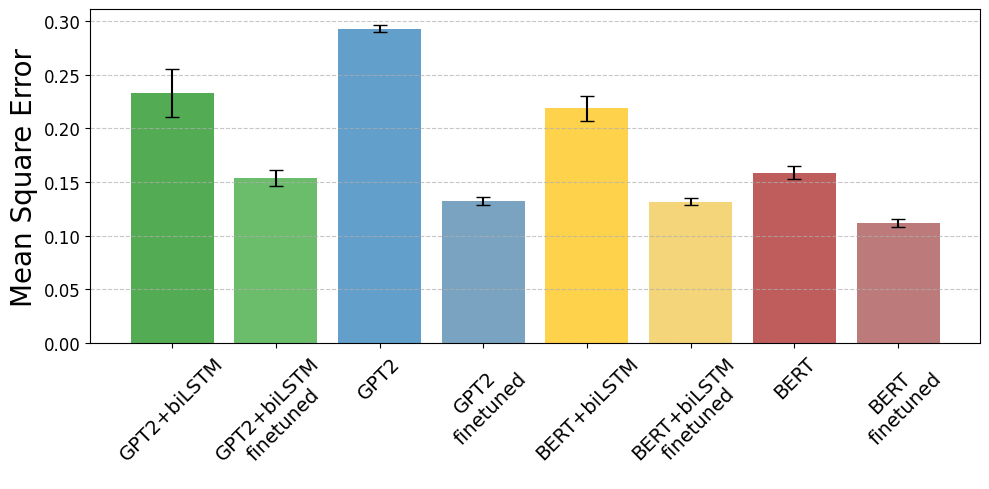

In [23]:
def plot_mse(algs, names):
    plt.figure(figsize=(10, 5))
    means = [np.mean(alg) for alg in algs]
    stds = [np.std(alg) for alg in algs]
    x = np.arange(len(names))  # the label locations
    positions = []
    for pos in x:
        positions.append(float(pos + 0))
    print(positions)
    plt.bar(positions, means, yerr=stds, capsize=5, color=colors, alpha=0.7)
    plt.xticks(positions, names, rotation=45, ha='center', fontsize=14)
    plt.tick_params(axis='y', labelsize=12)
    plt.ylabel('Mean Square Error', fontsize=20)
    #plt.title('Mean Squared Error (MSE) for the Different Models', font)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_mse(algs, names)